# Ejercicio 01 (R)

## Datos

In [84]:
df = read.csv('Liga_nacional_de_futbol.csv')

In [85]:
df

Equipo,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>
Washington,10,2113,1985,38.9,64.7,4,868,59.7,2205,1917
Minnesota,11,2003,2855,38.8,61.3,3,615,55.0,2096,1575
New England,11,2957,1737,40.1,60.0,14,914,65.6,1847,2175
Oakland,13,2285,2905,41.6,45.3,-4,957,61.4,1903,2476
Pittsburgh,10,2971,1666,39.2,53.8,15,836,66.1,1457,1866
Baltimore,11,2309,2927,39.7,74.1,8,786,61.0,1848,2339
Los Ángeles,10,2528,2341,38.1,65.4,12,754,66.1,1564,2092
Dallas,11,2147,2737,37.0,78.3,-1,761,58.0,1821,1909
Atlanta,4,1689,1414,42.1,47.6,-3,714,57.0,2577,2001


## a)
Ajustar un modelo de regresión lineal múltiple que relacione la cantidad de juegos ganados con las yardas por aire del equipo ($x_2$), el porcentaje de jugadas por tierra ($x_7$) y las yardas por tierra del contrario (x8).

In [86]:
X = model.matrix(y ~ x2 + x7 + x8, data = df)
y = df$y
n = nrow(X)
p = ncol(X)

In [110]:
beta_hat = solve(t(X) %*% X) %*% t(X) %*% y
beta_hat

(Intercept),-1.808372059
x2,0.003598070
x7,0.193960210
x8,-0.004815494


In [88]:
y_hat = X %*% beta_hat

In [101]:
SCT = as.numeric(t(y) %*% y - sum(y)**2 / n)
SCE = as.numeric(t(beta_hat) %*% t(X) %*% y - sum(y)**2 / n)
SSE = SCT - SCE
varest = SSE / (n-p)
cov_beta = varest * solve(t(X) %*% X)
se_beta = sqrt(diag(cov_beta))

---

In [102]:
full_model = lm(formula=y ~ x2 + x7 + x8, data=df)

In [103]:
summary(full_model)


Call:
lm(formula = y ~ x2 + x7 + x8, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0370 -0.7129 -0.2043  1.1101  3.7049 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.808372   7.900859  -0.229 0.820899    
x2           0.003598   0.000695   5.177 2.66e-05 ***
x7           0.193960   0.088233   2.198 0.037815 *  
x8          -0.004816   0.001277  -3.771 0.000938 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.706 on 24 degrees of freedom
Multiple R-squared:  0.7863,	Adjusted R-squared:  0.7596 
F-statistic: 29.44 on 3 and 24 DF,  p-value: 3.273e-08


## b) 
Formar la tabla de análisis de varianza y probar la significancia de la regresión.

In [104]:
GLT = n - 1
GLRes = n - p
GLR = p - 1
CMR = SCE/GLR
CMRes = SSE/GLRes
F_stat = CMR/CMRes
p_value_F <- pf(F_stat, GLR, GLRes, lower.tail = FALSE)

In [105]:
F_stat

[1] 29.43687

In [106]:
p_value_F

[1] 3.273458e-08

In [107]:
anova_manual <- data.frame(
  Source = c("Regression", "Residual", "Total"),
  Df = c(GLR, GLRes, GLR + GLRes),
  SumSq = c(SCE, SSE, SCT),
  MeanSq = c(CMR, CMRes, NA),
  F = c(F_stat, NA, NA),
  "Pr(>F)" = c(p_value_F, NA, NA)
)
print("ANOVA (manual)")
print(anova_manual)

[1] "ANOVA (manual)"
      Source Df    SumSq   MeanSq        F       Pr..F.
1 Regression  3 257.0943 85.69809 29.43687 3.273458e-08
2   Residual 24  69.8700  2.91125       NA           NA
3      Total 27 326.9643       NA       NA           NA


---

In [108]:
anov = anova(full_model)
anov

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x2,1,76.19340,76.19340,26.17205,3.100132e-05
x7,1,139.50082,139.50082,47.91784,3.697874e-07
x8,1,41.40006,41.40006,14.22072,9.377699e-04
Residuals,24,69.87000,2.91125,NA,NA


Las tres variables regresoras son significativas para el modelo, aunque x8 un poco menos que las demás.

## c)
Calcular el estadístico $t$ para probar las hipótesis

In [109]:
t_est = beta_hat / se_beta
t_est

(Intercept),-0.228883
x2,5.177090
x7,2.198262
x8,-3.771036


In [98]:
t_est

<0 x 0 matrix>

t crítico:

In [124]:
tt = qt(p = 0.95 + 0.05/2, df = n-p, lower.tail = TRUE)
tt

[1] 2.063899

#### $H_0: \beta_2 = 0$

In [52]:
t_est[2]

[1] 5.17709

El valor absoluto del estadístico t observado ($5.17709$) es mayor que el t tabuldado ($2.06389$), por lo que se rechaza la hipótesis nula $H_0: \beta_2 = 0$, es decir, la variable $x_2$ es significativa.

#### $H_0: \beta_7 = 0$

In [53]:
t_est[3]

[1] 2.198262

El valor absoluto del estadístico t observado ($2.19826$) es mayor que el t tabuldado ($2.06389$), por lo que se rechaza la hipótesis nula $H_0: \beta_7 = 0$, es decir, la variable $x_7$ es significativa.

#### $H_0: \beta_8 = 0$

In [54]:
t_est[4]

[1] -3.771036

El valor absoluto del estadístico t observado ($3.77103$) es mayor que el t tabuldado ($2.06389$), por lo que se rechaza la hipótesis nula $H_0: \beta_8 = 0$, es decir, la variable $x_8$ es significativa.

Las 3 variables regresoras son significativas en el modelo

## d)
Calcular $R^2$ y $R^2_{adj} $ para este modelo

In [119]:
R2 = SCE / SCT
R2

[1] 0.7863069

In [120]:
summary(full_model)$r.squared

[1] 0.7863069

In [121]:
R2_adj = 1 - ((SSE / (n - p)) / (SCT / (n - 1)))
R2_adj

[1] 0.7595953

In [122]:
summary(full_model)$adj.r.squared

[1] 0.7595953

Estos valores indican que las 3 variables regresoras son relevantes y proporcionan un modelo bastante bueno, y la diferencia pequeña entre $R^2$ y $R^2_{adj}$ indica que no se está sobreajustando el modelo con predictores inútiles.

## e)
Trazar una gráfica de probabilidad normal de los residuales. ¿Parece haber algún problema con la hipótesis de normalidad?

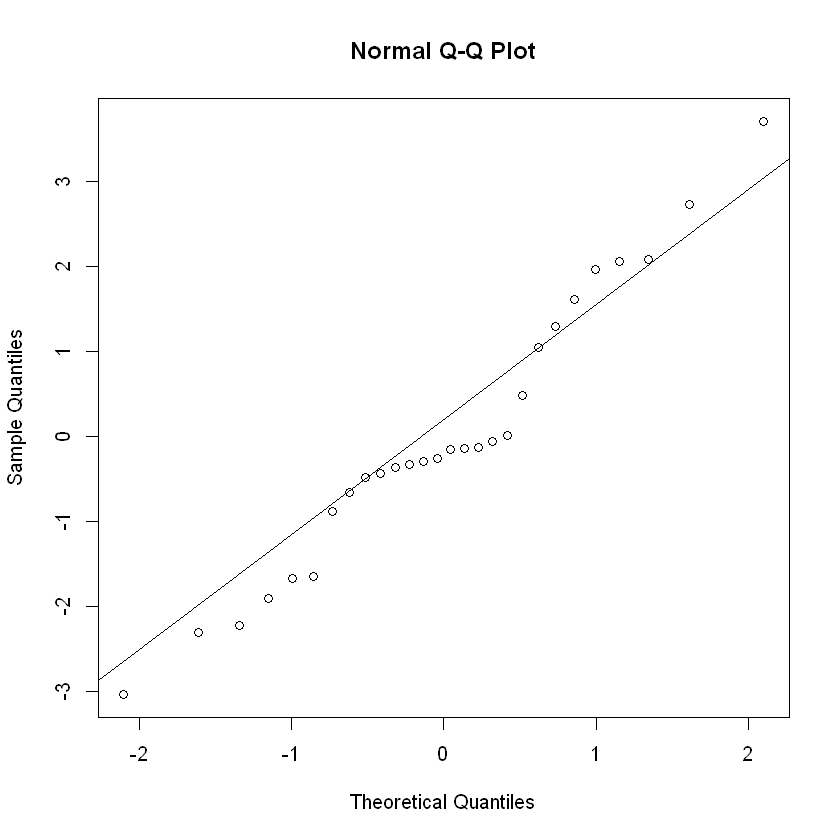

In [64]:
residuales = resid(full_model)
qqnorm(residuales)
qqline(residuales)

Los residuales en el centro algunos se alejen un poco de la línea, y los de las colas tampoco se desvían tanto, por lo que parece que sí siguen una normalidad.

## f)
Trazar e interpretar una gráfica de los residuales en función de la respuesta predicha.

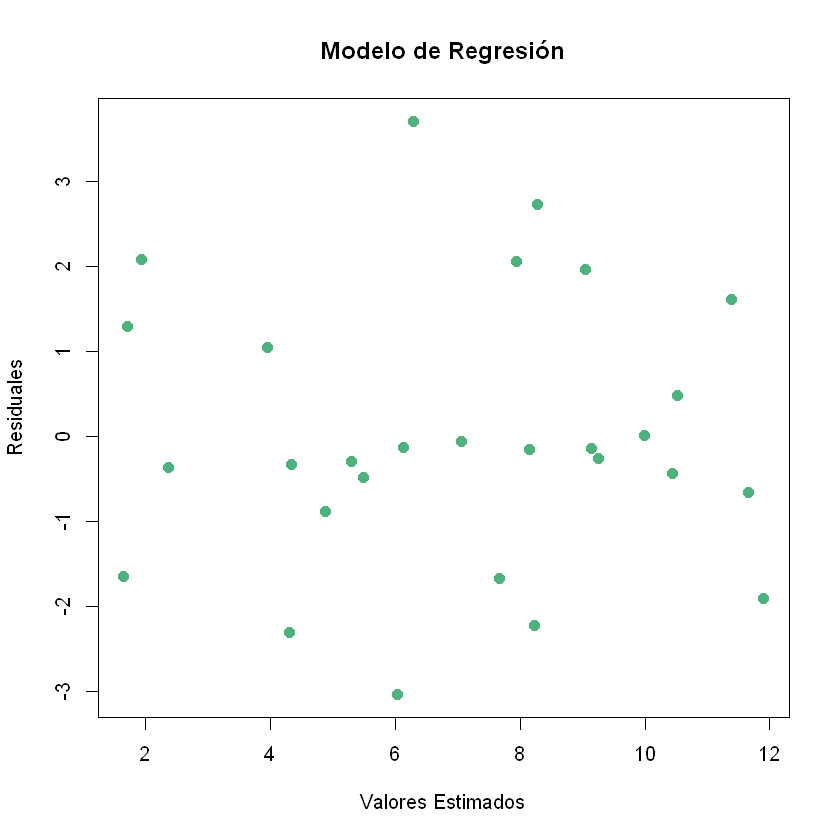

In [69]:
plot(fitted(full_model), residuales,
    xlab = "Valores Estimados",
     ylab = "Residuales",
     main = "Modelo de Regresión",
     pch = 19, col = "#4bb37b", cex = 1.2)

Aunque en el centro se forma algo parecido a una línea horizontal, no hay un patrón claro en los residuales y están dispersos, por lo que se podría decir que se tiene unn modelo adecuado.

## g)
Trazar las gráficas de los residuales en función de cada una de las variables regresoras. ¿Implican esas gráficas que se especificó en forma correcta el regresor?

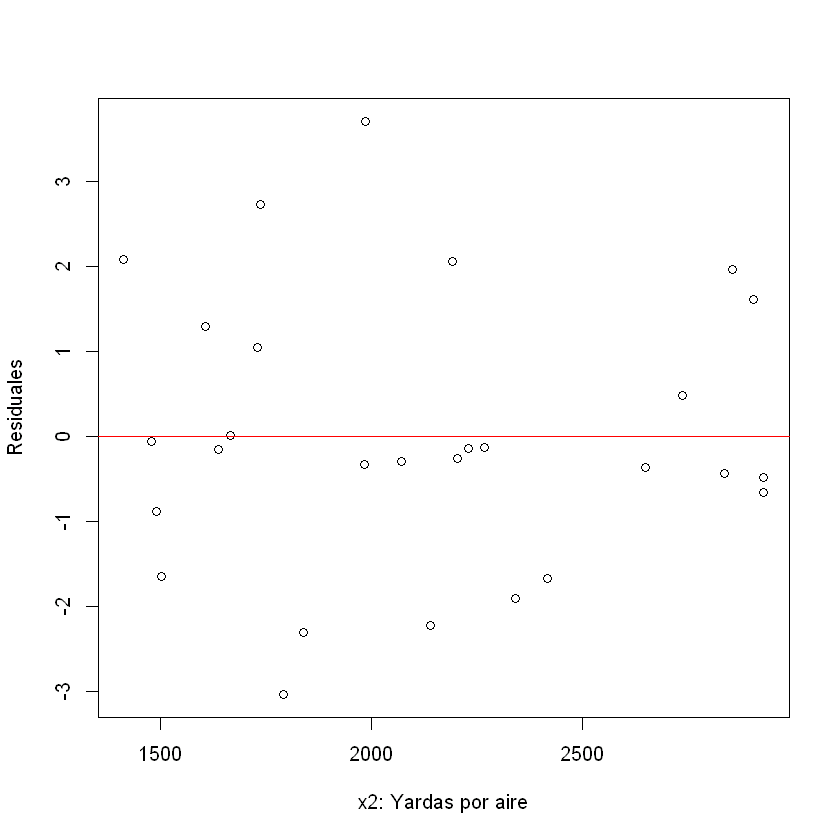

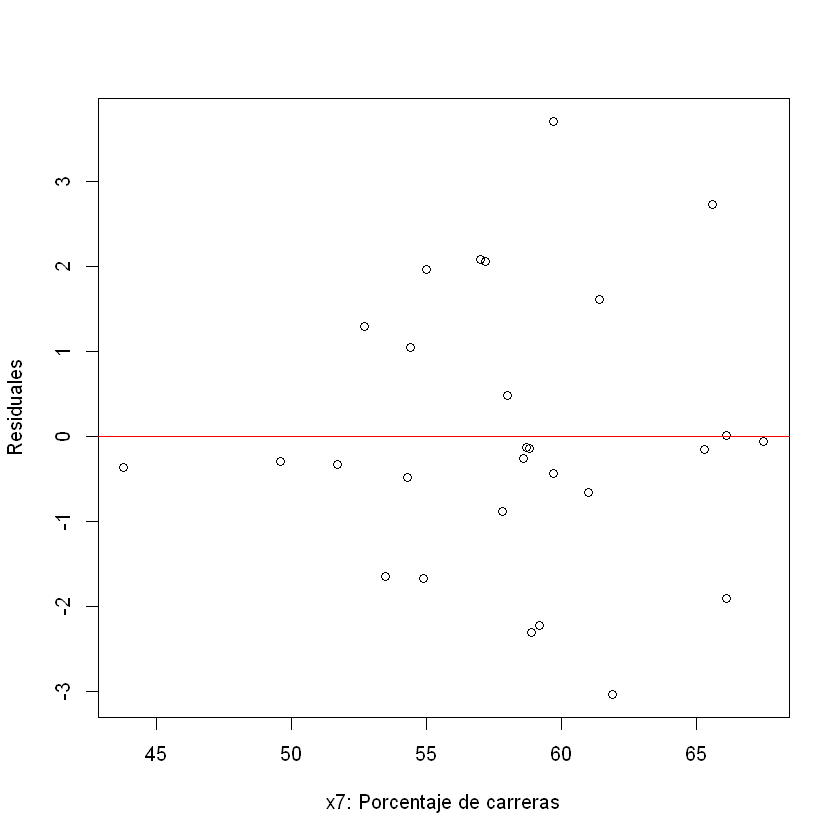

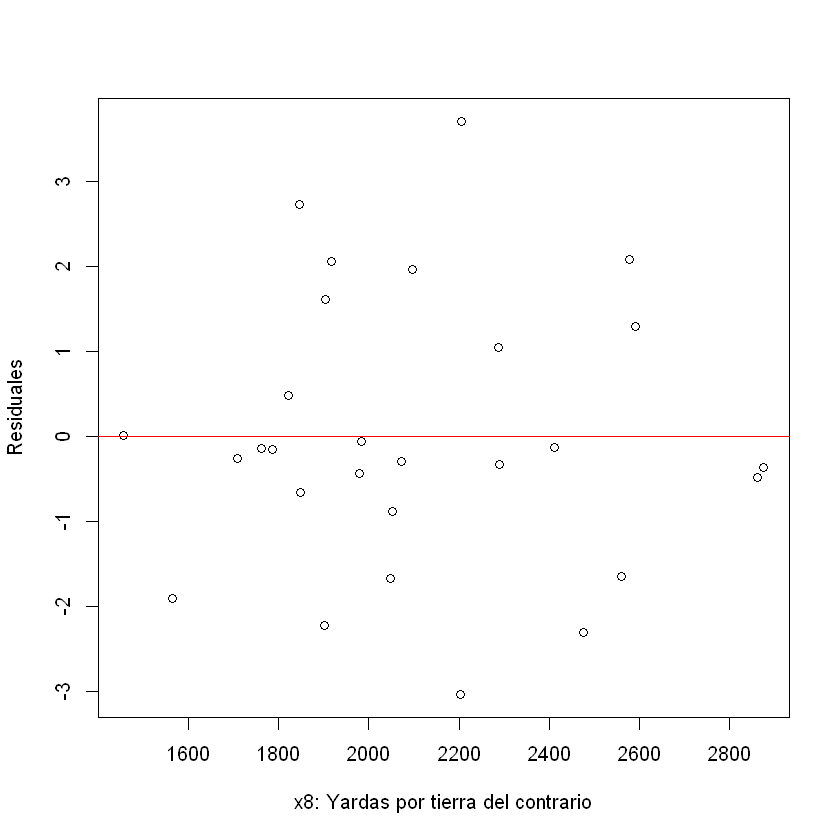

In [75]:
plot(df$x2, residuales, xlab="x2: Yardas por aire", ylab="Residuales")
abline(h=0, col="red")

plot(df$x7, residuales, xlab="x7: Porcentaje de carreras", ylab="Residuales")
abline(h=0, col="red")

plot(df$x8, residuales, xlab="x8: Yardas por tierra del contrario", ylab="Residuales")
abline(h=0, col="red")

Para las tres variables, se tiene una dispersión que parece aleatoria, es decir, no se observan patrones o tendencias, por lo que el modelo especifica bien las relaciones entre las variables y la respuesta.

## h)
Calcular un intervalo de confianza de $95%$ para $\beta_7$. También, un intervalo de confianza de $95%$ para la cantidad media de juegos ganados por un equipo cuando $x_2=2300, x_7=56$ y $x_8=2100$

In [125]:
beta7_hat = beta_hat[3, 1]
se_beta7 = se_beta[3]
ic_beta7_izq = beta7_hat - tt * se_beta7
ic_beta7_der = beta7_hat + tt * se_beta7

In [128]:
cat("Intervalo de confianza 95% para β₇:\n")
cat("Límite inferior:", round(ic_beta7_izq, 4), "\n")
cat("Estimación:", round(beta7_hat, 4), "\n")
cat("Límite superior:", round(ic_beta7_der, 4), "\n")
cat("Longitud:", round(ic_beta7_der-ic_beta7_izq, 4), "\n")

Intervalo de confianza 95% para β₇:
Límite inferior: 0.0119 
Estimación: 0.194 
Límite superior: 0.3761 
Longitud: 0.3642 


Al ser un intervalo de confianza que tiene una longitud corta, se tiene una estimación precisa, y al ser positivo se sugiere que $x_7$ se asocia positivamente con $y$.

In [102]:
confint(full_model, level = 0.95)["x7", ]

2.5 %     97.5 % 
0.01185532 0.37606510

In [130]:
X0 <- matrix(c(1, 2300, 56, 2100), nrow=4)
X0

1
2300
56
2100


In [131]:
y0 = t(X0) %*% beta_hat
y0

7.216424


In [132]:
var_y0 = varest * t(X0) %*% solve(t(X) %*% X) %*% X0
se_y0 = sqrt(var_y0)

In [136]:
ic_y0_izq <- y0 - tt * se_y0
ic_y0_der <- y0 + tt * se_y0

In [138]:
cat("\nIntervalo de confianza 95% para la respuesta media:\n")
cat("Límite inferior:", round(ic_y0_izq, 4), "\n")
cat("Predicción:", round(y0, 4), "\n")
cat("Límite superior:", round(ic_y0_der, 4), "\n")
cat("Longitud:", round(ic_y0_der-ic_y0_izq, 4), "\n")


Intervalo de confianza 95% para la respuesta media:
Límite inferior: 6.4362 
Predicción: 7.2164 
Límite superior: 7.9966 
Longitud: 1.5604 


Al ser un intervalo de confianza que tiene una longitud relativamente corta, indica que la predicción tiene una precisión razonable.

## i)
Ajustar un modelo a esos datos, usando solo $x_7$ y $x_8$ como regresores y probar la significancia de la regresión.

In [147]:
X2 = model.matrix(y ~ x7 + x8, data = df)
beta_hat2 = solve(t(X2) %*% X2) %*% t(X2) %*% y
y_hat2 = X2 %*% beta_hat2
n2 = nrow(X2)
p2 = ncol(X2)
SCT2 = as.numeric(t(y) %*% y - sum(y)**2 / n2)
SCE2 = as.numeric(t(beta_hat2) %*% t(X2) %*% y - sum(y)**2 / n2)
SSE2 = SCT - SCE
varest2 = SSE / (n2-p2)
cov_beta2 = varest * solve(t(X2) %*% X2)
se_beta2 = sqrt(diag(cov_beta))

In [143]:
model2 = lm(y ~ x7 + x8, data=df)

In [144]:
summary(model2)


Call:
lm(formula = y ~ x7 + x8, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7985 -1.5166 -0.5792  1.9927  4.5248 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 17.944319   9.862484   1.819  0.08084 . 
x7           0.048371   0.119219   0.406  0.68839   
x8          -0.006537   0.001758  -3.719  0.00102 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.432 on 25 degrees of freedom
Multiple R-squared:  0.5477,	Adjusted R-squared:  0.5115 
F-statistic: 15.13 on 2 and 25 DF,  p-value: 4.935e-05


In [148]:
beta_hat2

(Intercept),17.944318520
x7,0.048370869
x8,-0.006536593


In [149]:
anova(model2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x7,1,97.23815,97.238147,16.43668,0.0004309943
x8,1,81.82804,81.828040,13.83183,0.0010154260
Residuals,25,147.89810,5.915924,NA,NA


Ambas variables son significativas, aunque no se tiene un modelo tan bueno como el que considera las tres variables $x_2, x_7 $ y $x_8$

## j)
Calcular $R^2$ y $R^2_{adj}$. Compararlos con los resultados del modelo anterior.

In [150]:
R2 = SCE2 / SCT2
R2

[1] 0.5476628

In [99]:
summary(model2)$r.squared

[1] 0.5476628

In [151]:
R2_adj = 1 - ((SSE2 / (n2 - p2)) / (SCT2 / (n2 - 1)))
R2_adj

[1] 0.5114759

In [100]:
summary(model2)$adj.r.squared

[1] 0.5114759

El sólo considerar las dos variables $x_7$ y $x_8$ da un peor modelo de regresión múltiple que al considerar también la variable $x_2$, puesto que esta última sí es una variable regresora significativa y ofrece información importante al modelo.

## k)
Calcular un intervalo de confianza de $95%$ para $\beta_7$. También, un intervalo de confianza de $95%$ para la cantidad media de juegos ganados por un equipo cuando $x_7=56$ y $x_8=2100$. Comparar las longitudes de esos intervalos de confianza con las longitudes de los correspondientes al modelo anterior

In [153]:
gl2 = n2 - p2
tt2 = qt(p = 0.95 + 0.05/2, df = gl2, lower.tail = TRUE)
beta7_hat2 = beta_hat2[2, 1]
se_beta7_2 = se_beta[2]
ic2_beta7_izq = beta7_hat2 - tt2 * se_beta7_2
ic2_beta7_der = beta7_hat2 + tt2 * se_beta7_2

In [154]:
cat("Intervalo de confianza 95% para β₇:\n")
cat("Límite inferior:", round(ic2_beta7_izq, 4), "\n")
cat("Estimación:", round(beta7_hat2, 4), "\n")
cat("Límite superior:", round(ic2_beta7_der, 4), "\n")
cat("Longitud:", round(ic2_beta7_der - ic2_beta7_izq, 4), "\n")

Intervalo de confianza 95% para β₇:
Límite inferior: -0.1972 
Estimación: 0.0484 
Límite superior: 0.2939 
Longitud: 0.4911 


In [106]:
confint(model2, level = 0.95)["x7", ]

2.5 %     97.5 % 
-0.1971643  0.2939060

In [164]:
X1 = matrix(c(1, 56, 2100), nrow=3)
X1

1
56
2100


In [156]:
y1 = t(X1) %*% beta_hat2
y1

6.926243


In [161]:
var_y1 = varest * t(X1) %*% solve(t(X) %*% X) %*% X1
se_y1 = sqrt(var_y1)

In [162]:
ic_y1_izq <- y1 - tt * se_y1
ic_y1_der <- y1 + tt * se_y1

In [163]:
cat("\nIntervalo de confianza 95% para la respuesta media:\n")
cat("Límite inferior:", round(ic_y1_izq, 4), "\n")
cat("Predicción:", round(y1, 4), "\n")
cat("Límite superior:", round(ic_y1_der, 4), "\n")
cat("Longitud:", round(ic_y1_der-ic_y1_izq, 4), "\n")


Intervalo de confianza 95% para la respuesta media:
Límite inferior: 5.8263 
Predicción: 6.9262 
Límite superior: 8.0262 
Longitud: 2.1998 


Al quitar $x_2$, los intervalos de confianza se volvieron más amplios, es decir, la estimación se volvió menos precisa. Esto indica que $x_2$ era una variable importante. 

## l)
¿Qué conclusiones se pueden sacar de este problema, acerca de las consecuencias de omitir un regresor importante de un modelo?

Eliminar una variable regresora que sí es estadísticamente significativa, afecta de manera negativa la calidad del modelo que se está intentando hacer, dado que hace que se pierda información importante para predecir el comportamiento de los datos, es entonces que las métricas como $R^2$ y $R^2_{adj}$ resultan más bajas.